In [22]:
#import libraries
import numpy as np 
import pandas as pd 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import acf, pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
#import data set
df = pd.read_csv('train.csv')
df.head(10)

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,03-01-2015 01:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,03-01-2015 02:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2,03-01-2015 03:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
3,03-01-2015 04:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
4,03-01-2015 05:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0
5,03-01-2015 06:00,879.2323,26.034143,0.019080,0.014542,20.062038,22.995081,0.017028,0.001485,9.087273,22.456018,0.016410,0.061539,5.280351,0,0,0
6,03-01-2015 07:00,932.4876,26.691492,0.019332,0.006645,21.623496,24.285242,0.017424,0.002176,11.395393,22.949304,0.016570,0.060898,5.126911,0,0,0
7,03-01-2015 08:00,1048.9720,27.674066,0.019370,0.006863,23.775317,26.189691,0.018073,0.004539,12.872866,24.088129,0.016677,0.056198,5.060611,0,0,0
8,03-01-2015 09:00,1167.9074,28.760400,0.019171,0.010231,24.636152,27.916650,0.018454,0.004292,14.548027,25.479150,0.016646,0.051071,4.915658,0,0,0
9,03-01-2015 10:00,1257.5069,29.766656,0.018759,0.009018,25.862671,29.172906,0.018675,0.004921,15.081688,26.704156,0.016608,0.058685,4.685580,0,0,0


In [3]:
df.describe()

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
count,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000
mean,1184.102195,27.381070,0.018372,0.082358,13.018476,26.869752,0.017909,0.109571,6.934124,24.678938,0.016912,0.148480,3.562928,0.730828,0.062501,0.739600
std,193.512875,1.652179,0.001587,0.065835,7.151448,2.960669,0.001853,0.086249,4.055238,2.374089,0.001566,0.088259,1.709116,3.244740,0.242067,0.438858
min,85.192500,22.953455,0.012054,0.000000,0.008979,19.765222,0.010385,0.000009,0.060431,19.933740,0.009655,0.000051,0.015497,0.000000,0.000000,0.000000
25%,1017.453350,26.168436,0.017337,0.028423,7.387169,24.767938,0.016707,0.040314,3.912895,22.951654,0.015867,0.079285,2.301747,0.000000,0.000000,0.000000
50%,1173.251500,27.109338,0.018670,0.068237,11.767408,26.141260,0.018418,0.089752,5.888003,23.981989,0.017224,0.134277,3.408653,0.000000,0.000000,1.000000
75%,1332.279950,28.521463,0.019549,0.120148,18.038599,28.642450,0.019265,0.161377,9.151058,26.174570,0.018092,0.204773,4.652970,0.000000,0.000000,1.000000
max,1721.515700,35.039575,0.022690,0.521240,39.229726,39.063440,0.022011,0.484985,24.483937,34.216211,0.020958,0.477783,10.288902,22.000000,1.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43775 entries, 0 to 43774
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    43775 non-null  object 
 1   nat_demand  43775 non-null  float64
 2   T2M_toc     43775 non-null  float64
 3   QV2M_toc    43775 non-null  float64
 4   TQL_toc     43775 non-null  float64
 5   W2M_toc     43775 non-null  float64
 6   T2M_san     43775 non-null  float64
 7   QV2M_san    43775 non-null  float64
 8   TQL_san     43775 non-null  float64
 9   W2M_san     43775 non-null  float64
 10  T2M_dav     43775 non-null  float64
 11  QV2M_dav    43775 non-null  float64
 12  TQL_dav     43775 non-null  float64
 13  W2M_dav     43775 non-null  float64
 14  Holiday_ID  43775 non-null  int64  
 15  holiday     43775 non-null  int64  
 16  school      43775 non-null  int64  
dtypes: float64(13), int64(3), object(1)
memory usage: 5.7+ MB


In [5]:
df['datetime'] = pd.to_datetime(df['datetime'], format="%d-%m-%Y %H:%M")

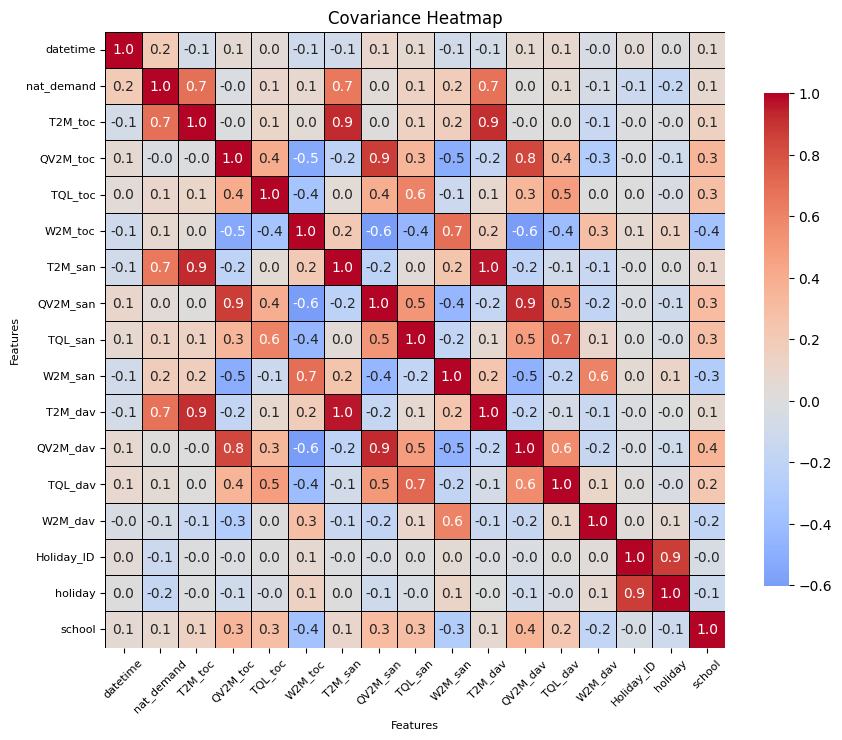

In [6]:
#correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm', center=0, fmt='.1f', linewidths=0.5, linecolor='black', cbar_kws={"shrink": .8})
plt.title('Covariance Heatmap')
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Features', fontsize=8)
plt.ylabel('Features', fontsize=8)
plt.show()


In [7]:
columns = ['nat_demand', 'T2M_toc', 'QV2M_toc', 'TQL_toc', 'W2M_toc',
       'T2M_san', 'QV2M_san', 'TQL_san', 'W2M_san', 'T2M_dav', 'QV2M_dav',
       'TQL_dav', 'W2M_dav', 'holiday', 'school']
scaler = StandardScaler()
df[columns] = scaler.fit_transform(df[columns])


In [8]:
feature1 = ['T2M_toc','T2M_san','T2M_dav']
pca1 = PCA(n_components=2)
pca1 = pca1.fit(df[feature1])
explained_variance = pca1.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
print(cumulative_variance)

[0.95444099 0.98613484]


The PCA1 is caputured more than 90% variability from the three features that we considered. Therefore, I choosed first principle to the three demonstrate the three features. 

In [9]:
feature2 = ['QV2M_toc','QV2M_san','QV2M_dav']
pca2 = PCA(n_components=2)
pca2 = pca2.fit(df[feature2])
explained_variance_Y = pca2.explained_variance_ratio_
cumulative_variance_Y = np.cumsum(explained_variance)
print(cumulative_variance_Y)

[0.95444099 0.98613484]


In [10]:
df['pca1'] = pca1.fit_transform(df[feature1])[:,0]
df['pca2'] = pca2.fit_transform(df[feature2])[:,0]

In [12]:
new_df_columns = ['datetime', 'nat_demand', 'pca1', 'pca2','TQL_toc', 'W2M_toc','TQL_san', 'W2M_san','TQL_dav', 'W2M_dav','holiday', 'school']
new_df = df[new_df_columns]

In [13]:
new_df.head()

,datetime,nat_demand,pca1,pca2,TQL_toc,W2M_toc,TQL_san,W2M_san,TQL_dav,W2M_dav,holiday,school
0,2015-01-03 01:00:00,-1.104627,-1.681234,-0.257580,-1.005302,1.235019,-1.248909,0.837155,-0.593493,1.053902,-0.258202,-1.685304
1,2015-01-03 02:00:00,-1.405228,-1.706096,-0.251866,-1.001593,1.279262,-1.255035,0.924098,-0.689274,1.175793,-0.258202,-1.685304
2,2015-01-03 03:00:00,-1.466758,-1.715563,-0.239064,-1.015848,1.319529,-1.253863,0.971791,-0.790241,1.350571,-0.258202,-1.685304
3,2015-01-03 04:00:00,-1.520063,-1.733676,-0.219088,-1.003795,1.271366,-1.240290,0.883928,-0.907460,1.357848,-0.258202,-1.685304
4,2015-01-03 05:00:00,-1.500774,-1.767540,-0.219894,-0.988498,1.142105,-1.250375,0.690341,-0.953103,1.198760,-0.258202,-1.685304


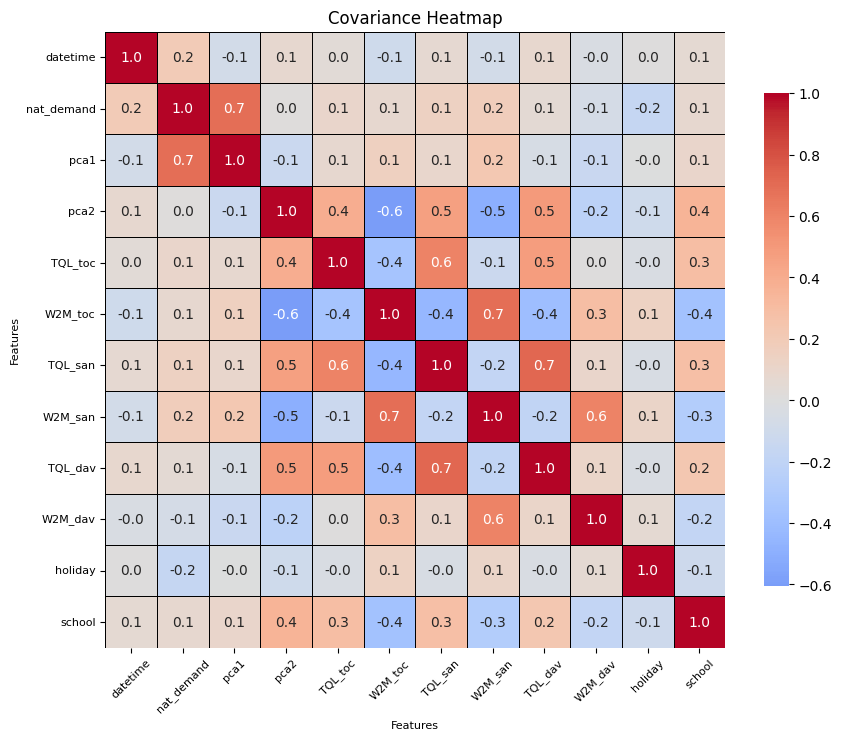

In [14]:
#correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(new_df.corr(), annot = True, cmap='coolwarm', center=0, fmt='.1f', linewidths=0.5, linecolor='black', cbar_kws={"shrink": .8})
plt.title('Covariance Heatmap')
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Features', fontsize=8)
plt.ylabel('Features', fontsize=8)
plt.show()

We can see clear correlation between nat_demand and pca1. Therefore, we will consider pca1 and nat_demadn as input variables for forecasting the future values of nat_demand.

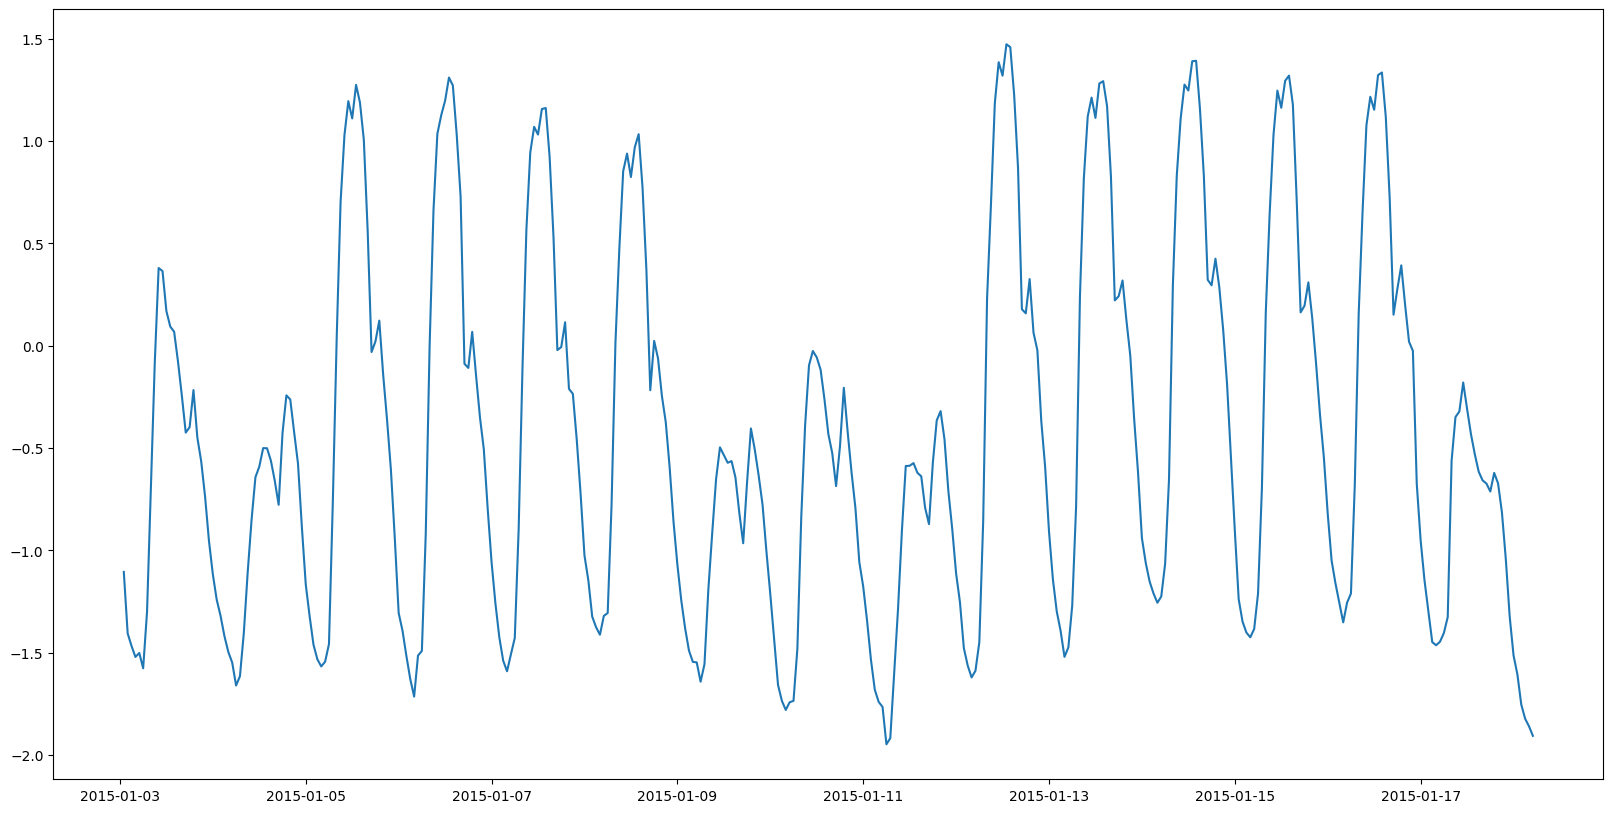

In [21]:
#plotting time series data
plt.figure(figsize=(20,10))
plt.plot(new_df['datetime'][:365], new_df['nat_demand'][:365], label='nat_demand')
plt.show()

In [26]:
#check stationarity of nat_demand
adf = adfuller(new_df['nat_demand'])
print('p-value:', adf[1])

p-value: 0.0


This is strong evidence to ensure that the nat_demand series is stationary time series.

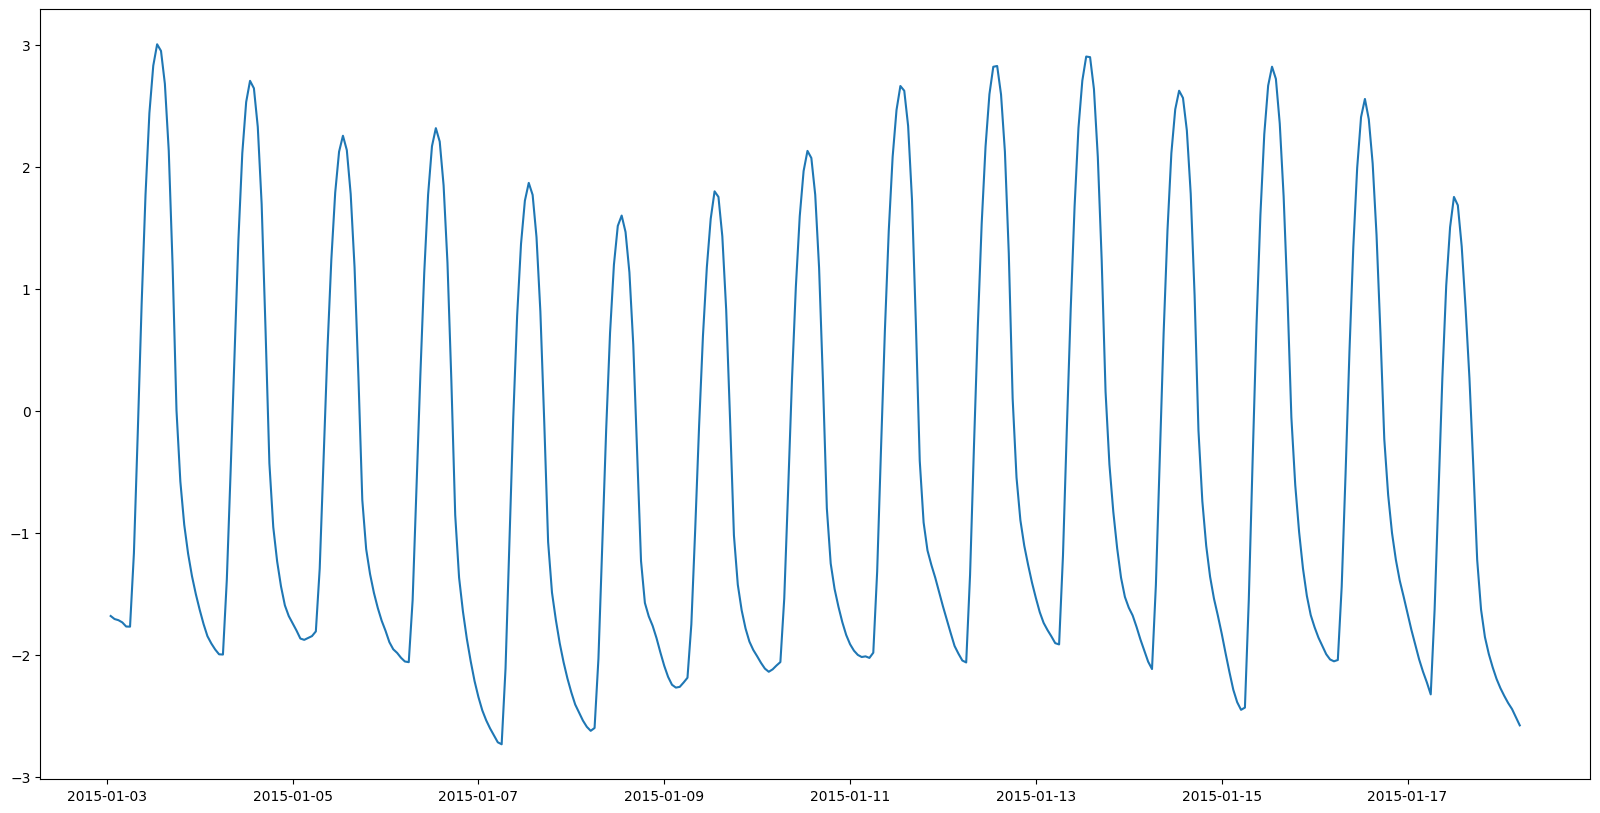

In [27]:
#plotting time series data
plt.figure(figsize=(20,10))
plt.plot(new_df['datetime'][:365], new_df['pca1'][:365], label='pca1')
plt.show()

In [28]:
#check stationarity of pca1
adf = adfuller(new_df['pca1'])
print('p-value:', adf[1])

p-value: 6.656282626976763e-17
